<a href="https://colab.research.google.com/github/paulsubarna/Convolutional-LSTM-using-Pytorch/blob/main/Curriculum_Learning_tutorial_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Curriculum Learning

In this tutorial, we will explore various Curriculum Learning strategies, as discussed in Lecture []. Traditionally, neural networks are trained on entire datasets using mini-batch updates. However, in this notebook, we take a different approach by dividing the dataset into smaller segments or bins of data. We will analyze the model's performance as it progressively trains on these bins for certain epochs until it has processed all the bins. Such a training paradigm has shown to reduce the training time complexity in manifolds as well as assisting the model to convergae better as can be seen in the figure below.

As part of this notebook, we will try to replicate the observations as presented in one of the pioneering works in Curriculum learning by [Yoshua Bengio](https://dl.acm.org/doi/pdf/10.1145/1553374.1553380). We will closely follow the training setup discussed in this work where the authors try to train a language model with Wiki Text dataset in a Curriculum fashion. So, it would be highly recommended to first go through this paper and then try to solve this notebook.

</figure>

<p align="middle">

  <img  src="loss_curve.png"   width=400 hspace="20" />  <img src="final_res.png" width=400 />
  <figcaption><h4 align="center">Comparison of learning curves for curriculum and (No) curriculum strategies. (a) Reported validation in Bengio's paper (b) The expected validation curve for this notebook  </h4></figcaption>

</p>
</figure>


Our final goal of this notebook would be to achieve such a validation loss curve at the end of the training cycle as shown in the Figure (b). It is not important you reproduce the exact figure, as you can have chosen to plot it differently and there is stochasticity in optimization. However, the trend should be visible. If you don't see the curriculum surpassing the non-curriculum curve, go back and re-check your code"



The notebook will broadly be divided into three main parts:
- Implement curriculum learning with a simple language model on textual data
- Investigate the implications behind anti-curriculum learning strategy.
- Finally, we explore the efficacy of LSTMs to generate texts in curriculum fashion.




#### Let us begin with the installing the necessary libraries

In [ ]:
"""
For pytorch 2.0 use '!pip install torchdata'
"""
## Install the necessary packages
# use only if necessary

#!pip install torch==2.3.0 torchtext==0.18.0

## Check the installed versions
!pip show torch torchtext

In [ ]:
import torch
import random
import re
from tqdm import tqdm
from typing import Tuple
from typing import Optional
from torch import nn, Tensor
from collections import Counter
import matplotlib.pyplot as plt
from torchtext.vocab import vocab
from torch.utils.data import dataset
from torchtext.data.utils import get_tokenizer
from torch.utils.data import DataLoader, Dataset
from torchtext.vocab import build_vocab_from_iterator

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Let us now load the dataset.
- In this notebook, we will use one of the most popular text datasets, WikiText2. The dataset is a collection of over 100 million tokens extracted from the set of verified Good and Featured articles on Wikipedia. The dataset is commonly used in the scope of language modeling.
- We have provided the dataset in the form of a .txt file for ease of use.

In [ ]:
# change the path and name of the files accordingly

with open("/app/src/wiki.train.txt", "r") as train, \
     open("/app/src/wiki.valid.txt", "r") as val, \
     open("/app/src/wiki.test.txt", "r") as test:

    train_data = train.readlines()
    val_data = val.readlines()
    test_data = test.readlines()

    valid_data =  val_data + test_data



#### Data Preprocessing

- Now, we will proceed to clean the raw text file. We will try to remove any special characters except english alphabets, that also includes remove punctuations, ascii characters, extra white spaces, and numerical characters.

<em> HINT! <em>
Recommended to use one of the widely used libraries to process the data such as nltk, RegEx


In [ ]:
#**** ------------------- TO-DO ------------------- ****
### Preprocess the data: Both for training and validation data
for i in range(len(train_data)):
### Remove the unwanted characters (anything other than a-z, A-Z)

### Remove the digits

### Remove the extra spaces

for i in range(len(valid_data)):



#### Define a tokenizer and create a vocabulary for the dataset
- In this notebook, we will use the basic_english tokenizer from torchtext to tokenize the text data.
- We will then create a vocabulary from the training data using the build_vocab_from_iterator function from torchtext.
TO-DO:
1. Complete the Vocabulary class with the following methods
    - word_to_idx
    - idx_to_word
    - length of the vocabulary
    - initialization method

In [ ]:
""" builds vocab out of corpus and sorts in descending order of frequency
  The model should have max vocab of 30k words
  **  """


## Tokenizer
tokenizer = get_tokenizer('basic_english')

### VOcalbulary class
class Vocabulary(Dataset):
  def __init__(self, wikidata, tokenizer):
    """ This method should build the vocab from the corpus """
    super(Vocabulary, self).__init__()
    self.tokenizer = tokenizer
    self.wikidata = wikidata

    # actual length of train vocab is 30k
    ## The vocab should be built using the build_vocab_from_iterator method ##
    """ -- TO-DO -- """



  def word_to_idx(self, word):
    """ This method should return the index of the word in the vocab """
    """ -- TO-DO -- """

    return

  def idx_to_word(self, idx):
    """ This method should return the word given the index """
    """ -- TO-DO -- """

    return
  def __len__(self):
    """ This method should return the length of the vocab """
    """ -- TO-DO -- """

    return

#### Convert raw text into tensor tokens

- Create a function to transform the text data into a tensor of indices
- Use the vocabulary object and the tokenizer to transform the raw text into a tensor of indices

TO-DO:
1. Define the data_process function. The function should have the following arguments:
    - vocabulary: The vocabulary object
    - raw_text_iter: The raw text data
    - The function should return a flat tensor of the raw text data

In [ ]:
""" Converts raw text into a flat Tensor
**** ------------------- TO-DO ------------------- ****
### Define the data_process function
The function should have the following arguments:
1. vocabulary: The vocabulary object
2. raw_text_iter: The raw text data
The function should return a flat tensor of the raw text data

"""

def data_process(vocabulary, raw_text_iter: dataset.IterableDataset) -> Tensor:
    """ TODO: Converts raw text into a flat Tensor """
    # Tokenize the raw text data
    # and convert it to a tensor using the vocabulary
    # vocabulary.corpus_vocab(tokenizer(item))
    # The corpus_vocab method should be defined in the Vocabulary class
    # and should return the tensor of the tokenized text data
    # The data should be converted to a tensor of type long
    # and should be concatenated into a single tensor


    return

#### Let us now craft the dataset and dataloaders

- For textual data, we would expect our dataloader to return windows of tokens from the dataset class
- Experiment with the batch size, num_workers in dataloader object

TO-DO:

1. Create the dataset class for training and validation data. The class should have the following methods:
- __init__: This method should initialize the dataset
- __len__: This method should return the length of the dataset
- __getitem__: This method should return the data at the given index

In [ ]:


MAX_VOCAB =  27000
batch_size = 128

class Wikipedia_Dataloader(Dataset):
  """ This class should create a dataset for the Wikipedia data """
  def __init__(self, corpus, vocab_len):
    self.corpus = corpus
    self.vocab_len =  vocab_len
    self.seq_len = 5

  def __len__(self):
    """ This method should return the length of the dataset """
    """ -- TO-DO -- """
    return

  def __getitem__(self, idx):
    """ This method should return the window data for the given index """
    """ -- TO-DO -- """
    # The data should be returned as a tuple of two tensors
    # The first tensor should be the input data
    # The second tensor should be the window data with randomly selected word at the last index
    ## HINT: Refer to the paper recommended in the assignment


    return


#### prepare data loaders
## For the ease of simplicity, lets us use the first 20k words of the voca for the training and the validation data
# I have defined the objects for the vocab, training dataset and dataloaders. Follow the same for the validation data
vocabulary = Vocabulary(train_data, tokenizer)
train_iter = data_process(vocabulary, train_data)
wiki_data_train = Wikipedia_Dataloader(train_iter, 20000)
data_loader = DataLoader(wiki_data_train, batch_size= batch_size, drop_last=True)

""" ---- TO-DO ----
### Create the respective validation data objects"""


In [ ]:
lr = 1e-3
epochs = 20
embed_dim = 50
batch_size = 128
hidden_units = 100


#### Define a simple language model

- Step 1: Encode each word into a multi-dimensional vector embedding
- Step 2: Pass the embeddings through a simple multi-layer perceptron.
- Step 3: The model should output only a single word

HINT: If you had read the cited paper, we would have probably seen the authors have used look-up tables for embeddings. Use torch.nn.Embeddings function instead


In [ ]:
### Language Model
### The model should have the following layers:
### 1. Embedding layer
### 2. Flatten layer
### 3. Linear layer


class CurriculumLearning(nn.Module):
  def __init__(self, max_vocab, embed_dim, hidden_units):
    super(CurriculumLearning, self).__init__()
    """ This method should define the model architecture """
    """ -- TO-DO -- """
    self.max_vocab = max_vocab
    self.embed_dim = embed_dim
    self.hidden_units = hidden_units



  def forward(self, x):
    """ This method should define the forward pass of the model """
    """ -- TO-DO -- """

    return out

##### Before proceeding to Curriculum training, let us first conduct a joint training on entire vocabulary set.

For the sake of simplicity, we have choosen to use the first 20k words in our use case.
Define the following training attributes:

In [ ]:
""" ---- TO-DO ----  """
## Initialize the model

## Define the loss function

## Define the optimizer

## Define the learning rate scheduler
HINT: Use CosineLR scheduler from torch library

#### Helper function:

- To check whether a word falls into our pre-specified range of vocabulary of 20k words. IF not, we reject the complete window as also discussed in the paper


In [ ]:
def validate_window(fs_batch, fsw_batch, vocab_size) -> Tuple[Tensor, Tensor]:
    """
    Validate the window data to ensure that the indices are within the vocabulary size.
    Args:
        fs_batch (Tensor): The correct input data window.
        fsw_batch (Tensor): The incorrect data window with one randomly shuffled index at the end.
        vocab_size (int): The size of the vocabulary.
    Returns:
        Tuple[Tensor, Tensor]: The valid input and window data batches.

        ----- TO-DO -----
    """

    if len(indices) == 0:
        return torch.tensor([]), torch.tensor([])


    return valid_fs, valid_fsw

#### Define the training loop and similarily the evaluation loop.

- Read windows of texts
- Validate it through the validate_window function

HINT: The structure should be the same for both of these functions

In [ ]:
def train(data: torch.utils.data.dataloader.DataLoader,
          model: nn.Module,
          optimizer,
          loss_fn,
          vocab_size: Optional[int] = MAX_VOCAB

          ):
    """
    ----- TO-DO -----
    Train the model for one epoch.
    Args:
        data (torch.utils.data.dataloader.DataLoader): The training data loader.
        model (nn.Module): The model to train.
        optimizer: The optimizer for the model.
        loss_fn: The loss function for the model.
        vocab_size (int, optional): The size of the vocabulary. Defaults to MAX_VOCAB.
        ----- TO-DO -----
    """

    for fs, fsw in tqdm(data):

      ## First Validate the window data falls within the vocab size


      ## Check  the indices are not empty

      ## Get the scores for correct and incorrect data

      ## Transform the target to one-hot encoding

      ## Compute the loss

      ## Training loop
      ## Backpropagation
      ## Update the weights
      ## Zero the gradients
      ## Step the optimizer

      ## Add the loss to the total loss


    return ## average loss for the epoch





In [ ]:
def evaluate(data: torch.utils.data.dataloader.DataLoader,
          model: nn.Module,
          loss_fn,
          ):

""" ----- TO-DO -----

Construct a similar function for the evaluation on validation data
"""

    for fs, fsw in tqdm(data):

        ## First Validate the window data falls within the vocab size


        ## Check  the indices are not empty

        ## Get the scores for correct and incorrect data

        ## Transform the target to one-hot encoding

        ## Compute the loss

        ## Training loop
        ## Backpropagation
        ## Update the weights
        ## Zero the gradients
        ## Step the optimizer

        ## Add the loss to the total loss


        return ## average loss for the epoch




In [ ]:
### Start training the non-curriculum learning model
print('Training without Curriculum Learning \n----------------------------------------------------------')

collect_ranks = []    #torch.tensor([])
epochs= 4
for i in range(epochs):

  print(f'\nEpoch: {i + 1}/{epochs}')
  train(data_loader, model, optimizer_, loss_fn, vocab_size=20000)
  collect_ranks.append(evaluate(data_loader_valid, model, loss_fn))
  scheduler_.step()
  print(scheduler_.get_last_lr())

Training without Curriculum Learning 
----------------------------------------------------------

Epoch: 1/4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13238/13238 [00:52<00:00, 249.80it/s]


1580122
[Train] Loss: 0.7498
[Eval]  Loss:: 0.6925
[0.0021715728752538096]

Epoch: 2/4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13238/13238 [00:56<00:00, 236.04it/s]


1580116
[Train] Loss: 0.7193
[Eval]  Loss:: 0.6758
[0.004999999999999999]

Epoch: 3/4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13238/13238 [00:49<00:00, 266.88it/s]


1580129
[Train] Loss: 0.6691
[Eval]  Loss:: 0.5842
[0.00782842712474619]

Epoch: 4/4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13238/13238 [00:58<00:00, 225.84it/s]


1580129
[Train] Loss: 0.5299
[Eval]  Loss:: 0.4652
[0.009]


#### Plot the validation loss curve

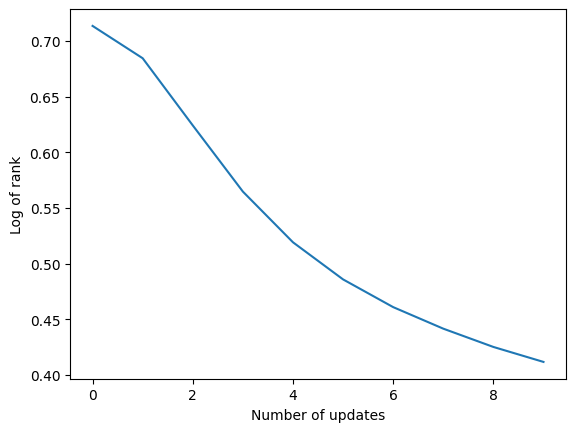

In [ ]:
fig, ax = plt.subplots()

x_cord = range(0, len(collect_ranks))
ax.plot(x_cord, collect_ranks)

ax.set_xlabel('Number of updates')
ax.set_ylabel('Loss curve ')
plt.show()

#### Training the model in curriculum fashion

We now transition to curriculum training. Model definition should be the same. However,unlike joint training, now we need to train our model with bins in a curriculum fashion. In this case, we will equally divide the data in terms of vocab size into four bins. That means, we will first training on first 5000 vocab words and then progressively add 5000 more words to the vocab until we reach 20k words. We simply reject any window with words outside the specified vocab range.

In [ ]:
# ***********************************************************
# training with Curriculum Learning
# ***********************************************************

model_curriculum = CurriculumLearning(27000, embed_dim, hidden_units).to(device)
loss_fn = nn.MarginRankingLoss(margin=1.0)
optimizer = torch.optim.SGD(model_curriculum.parameters(), lr = 1e-3)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=4, eta_min=9e-3)


In [ ]:
"""
*** ------------------- TO-DO ------------------- ****
1. Segment the training data into 4 parts
2. Create the data loaders for each part: Make sure you only use the first 5000 words of the vocab for bin 1 and then 10k fir bin 2 and so on
3. Create the data loader for the validation data- it will be the same as we had defined for the non-curriculum learning model
"""

### trianing data object definition
for i in range(4):



### Validation object definition will stay the same
vocabulary_v = Vocabulary(valid_data, tokenizer)
val_iter = data_process( vocabulary_v, valid_data)
wiki_data_valid = Wikipedia_Dataloader(val_iter, 20000)
data_loader_valid = DataLoader(wiki_data_valid, batch_size= batch_size, drop_last=True)


In [ ]:
def train(data: torch.utils.data.dataloader.DataLoader,
          model: nn.Module,
          optimizer,
          loss_fn,
          size: int,
          vocab_size: Optional[int] = MAX_VOCAB
          ):

    model.train()
    epoch_loss = 0
    for fs, fsw in tqdm(data):



In [ ]:
''' *** ------------------- TO-DO ------------------- ****
1. Train the model with curriculum learning
2. Use the same loss function and optimizer as we used for the non-curriculum learning model
3. Use the same learning rate scheduler as we used for the non-curriculum learning model
4. Use the same validation function as we used for the non-curriculum learning model
5. Use the same training function as we used for the non-curriculum learning model
'''

epochs = 1
ranks_cl = []
experiences = 4
vocab_init = 5000

print('Training with Curriculum Learning')
for exp in range(experiences):
  vocab_step = vocab_init * (1+exp)
  data_loader.dataset.vocab_len = vocab_step

  print('----------------------------------------------------------')

  for epoch in range(epochs):
    print(f'\nEpoch: ({epoch + 1}/{epochs}) | Experience: ({exp+1}/{experiences}) | Vocab size: {vocab_step}')
    train(train_loader[exp], model_curriculum, optimizer, loss_fn, 5000*(1+exp), vocab_step)
    ranks_cl.append(evaluate(data_loader_valid, model_curriculum, loss_fn))
    scheduler.step()
    print(scheduler.get_last_lr())

Training with Curriculum Learning
----------------------------------------------------------

Epoch: (1/1) | Experience: (1/4) | Vocab size: 5000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13238/13238 [00:57<00:00, 230.71it/s]


900635
[Train] Loss: 0.7456
[Eval]  Loss:: 0.7126
[0.0021715728752538096]
----------------------------------------------------------

Epoch: (1/1) | Experience: (2/4) | Vocab size: 10000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13238/13238 [00:48<00:00, 270.34it/s]


1267451
[Train] Loss: 0.7183
[Eval]  Loss:: 0.6773
[0.004999999999999999]
----------------------------------------------------------

Epoch: (1/1) | Experience: (3/4) | Vocab size: 15000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13238/13238 [00:57<00:00, 231.87it/s]


1459529
[Train] Loss: 0.6238
[Eval]  Loss:: 0.5373
[0.00782842712474619]
----------------------------------------------------------

Epoch: (1/1) | Experience: (4/4) | Vocab size: 20000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13238/13238 [00:48<00:00, 275.73it/s]


1580132
[Train] Loss: 0.5186
[Eval]  Loss:: 0.4616
[0.009]


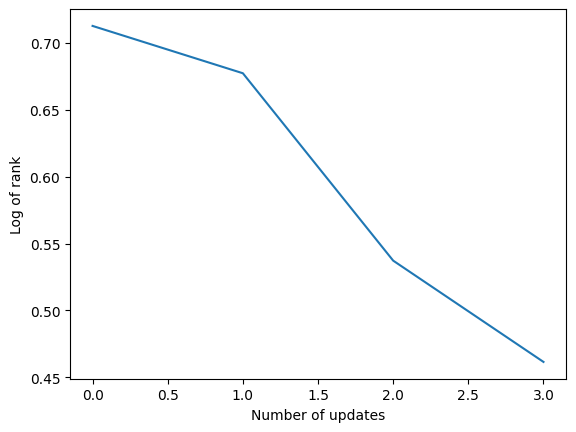

In [ ]:
fig, ax = plt.subplots()

x_cord = range(0, len(ranks_cl))
ax.plot(x_cord, ranks_cl)

ax.set_xlabel('Number of updates')
ax.set_ylabel('Log of rank')
plt.show()

#### Plotting the curves

Our final validation loss should look the plot shown below. It is not important you reproduce the exact figure, as you can have chosen to plot it differently and there is stochasticity in optimization. However, the trend should be visible. If you don't see the curriculum surpassing the non-curriculum curve, go back and re-check your code.

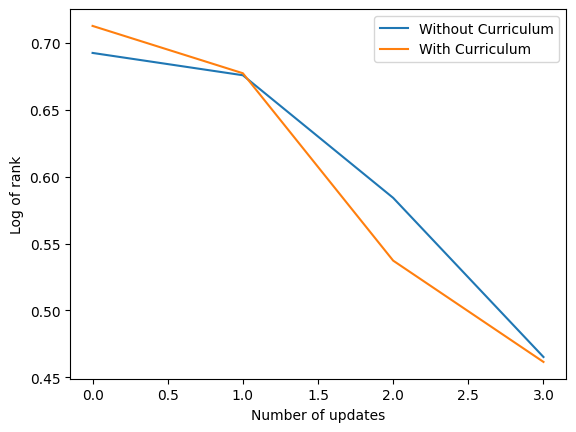

In [ ]:
### Plotting the validation curves of curriculum, and non-curriculum learning on top of each other and try to replicate the figure (b) shown in the introduction of this notebook

""" ___ TO-DO __ """






ax.set_xlabel('Number of updates')
ax.set_ylabel('Validation loss')

plt.legend()

plt.show()

#### Curriculum Learning with LSTMs.

In the previous experiments, we have seen that the model with curriculum learning is able to learn better than the model without curriculum learning.
Can we reciprocate the same findings with a LSTM ?

If you are unaware of LSTM models, please read this paper [LSTM](https://interactiveaudiolab.github.io/teaching/casa/HorchreiterSchmidhuber_LSTM.pdf)

- Perform the same experiments as above; now using LSTMs.
- The data processing, loading part will stay exactly the same whereas the real task woudl be to craft an LSTM model.
- We now only have to define a LSTM model by yourself.
- Train it with and without curriculum learning.

In [ ]:
### Load the data as before
with open("/app/src/wiki.train_.txt", "r") as file:
    train_data = file.readlines()
with open("/app/src/wiki.valid_.txt", "r") as file:
    val_data = file.readlines()

##### Data loading and pre-processing
- Preprocess the data: Both for training and validation data
- Define the VOcabulary class
- Define the data_process function
- Define the Wikipedia_Dataloader class
- Define the validate_window function
- Define the dataset, dataloader objects

In [ ]:
""" ___ TO-DO __ """
### Preprocess the data: Both for training and validation data
### Define the VOcabulary class
### Define the data_process function
### Define the Wikipedia_Dataloader class
### Define the validate_window function
### Define the dataset, dataloader objects



tokenizer = get_tokenizer('basic_english')
#train_words = tokenizer(train_data)
#train_words[:10]
from torch.nn.functional import one_hot

class Vocabulary(Dataset):
  def __init__(self, wikidata, tokenizer):
    self.tokenizer = tokenizer
    self.wikidata = wikidata



  def word_to_idx(self, word):
    return

  def idx_to_word(self, idx):
    return

  def __len__(self):
    return

def data_process(vocabulary, raw_text_iter: dataset.IterableDataset) -> Tensor:

    return

class Wikipedia_Dataloader(Dataset):
  def __init__(self, corpus, vocab_len):
    self.corpus = corpus
    self.vocab_len =  vocab_len
    self.seq_len = 32

  def __len__(self):
    return
  def __getitem__(self, idx):


    return

# prepare data loaders





# Validate window
def validate_window(x_, y_, vocab_size) -> Tuple[Tensor, Tensor]:


    return x_, y_

##### Define the LSTM Model
-  Embedding layer
-  LSTM layer
-  Linear layer
-  Dropout layer
-  Flatten layer

The model should have the following arguments:
-  features_vocab_total_words: The total number of words in the vocabulary
-  target_vocab_total_words: The total number of words in the target vocabulary
-  embedding_dim: The dimension of the embedding layer
-  hidden_dim: The dimension of the hidden layer
-  output_dim: The dimension of the output layer
-  dropout: The dropout rate
-  batch_first: Whether to use batch first or not
-  bidirectional: Whether to use bidirectional LSTM or not
-  num_layers: The number of layers in the LSTM

In [ ]:
if torch.cuda.is_available():
    print(f"Number of available GPUs: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("No GPU available")

# Set the correct device index (assuming the first GPU is available)
device = torch.device(0 if torch.cuda.is_available() else 'cpu')



""" ___ TO-DO __ """
### Define the model architecture


class My_LSTM(nn.Module):
    def __init__(self, features_vocab_total_words, target_vocab_total_words, embedding_dim, hidden_dim):
        super(My_LSTM, self).__init__()


    def forward(self, x):

        return output

embedding_dim = 128
hidden_dim = 256
epochs = 5
model = My_LSTM(len(vocabulary),len(vocabulary), embedding_dim=128, hidden_dim=256).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=4, eta_min=9e-3)

Number of available GPUs: 1
GPU 0: NVIDIA A100-SXM4-40GB


#### Training and Validation loop


In [ ]:
if torch.cuda.is_available():
    print(f"Number of available GPUs: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("No GPU available")

# Set the correct device index (assuming the first GPU is available)
result = []
device = torch.device(0 if torch.cuda.is_available() else 'cpu')
loss_fn = nn.CrossEntropyLoss()
epochs = 4
for e in range(epochs):
    losses = 0.0
    total = 0.0
    correct = 0.0
    correct_v = 0.0
    total_v = 0.0
    model.train()
    for i, batch in enumerate(tqdm(data_loader)):
        """
        ----- TO-DO -----
        1. Get the input and target data from the batch
        2. Validate the window data to ensure that the indices are within the vocabulary size.
        3. Check if the indices are not empty
        4. Make a forward pass through the model
        5. Transform the target to one-hot encoding
        6. Compute the loss
        7. Training loop
        8. Backpropagation

        """



    model.eval()
    ### Validation loop
    with torch.no_grad():
        losses = 0.0




#pred.shape

Number of available GPUs: 1
GPU 0: NVIDIA A100-SXM4-40GB


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13238/13238 [01:09<00:00, 189.83it/s]


Epoch 1/4 Loss: 0.06663457080703256
Epoch 1/4 Loss: 10.033507205547028
Validation Acc: 0.08264779031949493
Validation Loss: 9.698337886023472


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13238/13238 [01:07<00:00, 196.90it/s]


Epoch 2/4 Loss: 0.07845119646232303
Epoch 2/4 Loss: 8.755572950431166
Validation Acc: 0.09370723021000427
Validation Loss: 7.75493221123905


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13238/13238 [01:06<00:00, 198.19it/s]


Epoch 3/4 Loss: 0.08062569095253379
Epoch 3/4 Loss: 7.884087385917326
Validation Acc: 0.10112801871937131
Validation Loss: 7.42712804669016


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13238/13238 [01:06<00:00, 198.15it/s]


Epoch 4/4 Loss: 0.08390570949680824
Epoch 4/4 Loss: 7.649610068074416
Validation Acc: 0.10686376948094951
Validation Loss: 7.259653602513105


#### Generate dataloaders for Curriculum Training
- Use a similar strategy where you divide the vocabulary of 20k words into 4 bins.

In [ ]:
"""
    ----- TO-DO -----"
    1. Train loader
    2. Validation loader
"""

In [ ]:
if torch.cuda.is_available():
    print(f"Number of available GPUs: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("No GPU available")

""""
__ TO-DO __:
1. Define the model architecture
2. Define the loss function
3. Define the optimizer
4. Define the learning rate scheduler
5. Define the training and validation functions
6. Train the model with curriculum learning
7. Evaluate the model
""""


# Set the correct device index (assuming the first GPU is available)


#pred.shape

Number of available GPUs: 1
GPU 0: NVIDIA A100-SXM4-40GB


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13238/13238 [00:34<00:00, 384.57it/s]


Epoch 1/1 Loss: 0.025802266707508244
Epoch 1/1 Loss: 3.26955367373743
Validation Acc: 0.0773130638254036
Validation Loss: 10.122837078011385
Validation Loss: 10.122837078011385


  1%|█                                                                                                                   | 118/13238 [00:00<00:56, 231.13it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13238/13238 [00:56<00:00, 232.53it/s]


Epoch 1/1 Loss: 0.07950937778388946
Epoch 1/1 Loss: 7.781745519679845
Validation Acc: 0.0829789112743006
Validation Loss: 7.825514690984748
Validation Loss: 7.825514690984748


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13238/13238 [01:05<00:00, 203.51it/s]


Epoch 1/1 Loss: 0.08429347418791652
Epoch 1/1 Loss: 7.495172647177084
Validation Acc: 0.10452384806698944
Validation Loss: 7.060224631597105
Validation Loss: 7.060224631597105


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13238/13238 [01:08<00:00, 193.22it/s]


Epoch 1/1 Loss: 0.0952667522556257
Epoch 1/1 Loss: 7.212542000467422
Validation Acc: 0.10992847787376198
Validation Loss: 6.846938437714392
Validation Loss: 6.846938437714392


#### Validate your findings by plotting the loss curves

In [ ]:

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()